# MovieLens DataSet
## Analysis of Movies and Ratings from MovieLens
![](Data/Movielens/movies.jpg)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load Dataset
This dataset is big, you can download it from this site:
https://grouplens.org/datasets/movielens/

In [8]:
#movies = pd.read_csv('Data/Movielens/Small/movies.csv')
movies = pd.read_csv('/home/boyto/DataSets/MovieLensResearch/movies.csv')
#movies = pd.read_csv('/home/nati/DataSets/ml-20m/movies.csv')
movies.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [9]:
movies['year'] = movies['title'].str.extract(r"\(([0-9]+)\)",expand=False)
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [10]:
ratings = pd.read_csv('/home/boyto/DataSets/MovieLensResearch/ratings.csv')
#ratings = pd.read_csv('Data/Movielens/Small/ratings.csv')
ratings.sample(3)

,userId,movieId,rating,timestamp
16443884,113834,4306,4.0,1302809664
9904130,68434,1,5.0,862554596
2980413,20229,58,5.0,1108485246


In [11]:
# Check how many movies and ratings we have
print(len(ratings))
print(len(movies))

20000263
27278


In [6]:
import datetime
ratings['date'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings.head()

,userId,movieId,rating,timestamp,date
0,1,2,3.5,1112486027,2005-04-02 23:53:47
1,1,29,3.5,1112484676,2005-04-02 23:31:16
2,1,32,3.5,1112484819,2005-04-02 23:33:39
3,1,47,3.5,1112484727,2005-04-02 23:32:07
4,1,50,3.5,1112484580,2005-04-02 23:29:40


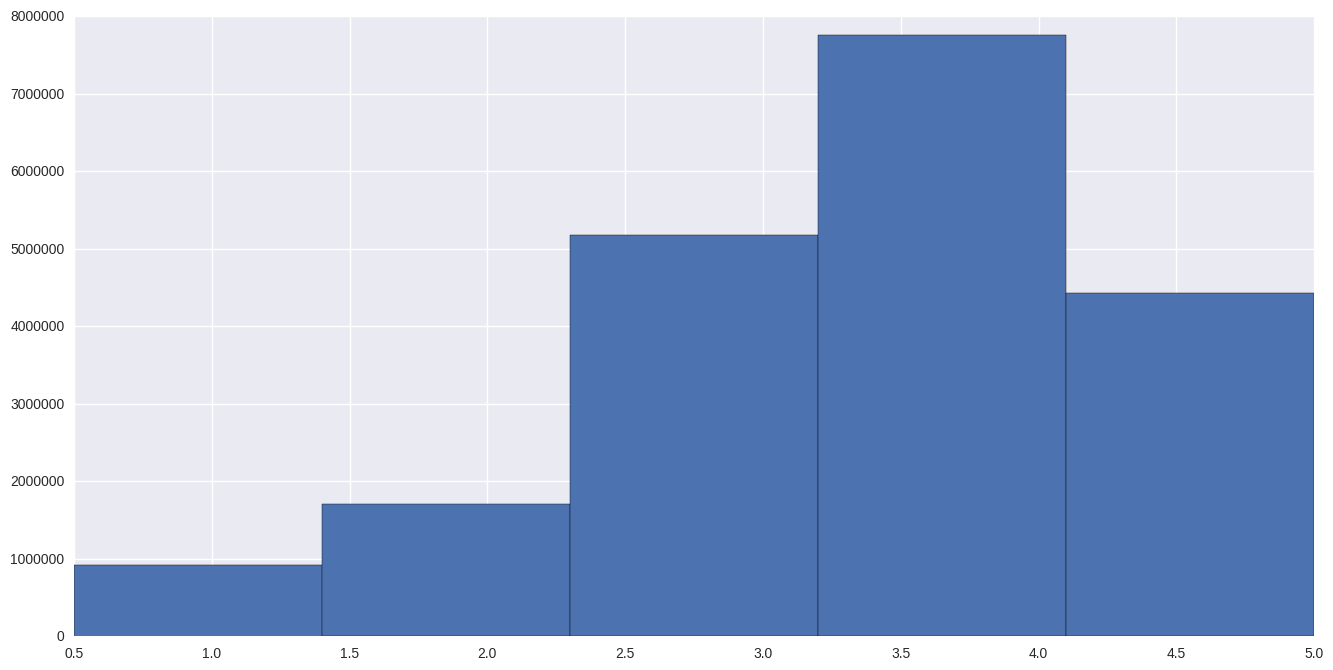

In [7]:
# Histogram of ratings
ratings['rating'].hist(figsize=(16,8),bins=5);

## Build Stats About movies
Join movies and ratings, group by movie

In [8]:
rated_movies = pd.merge(movies,ratings, left_on='movieId', right_on='movieId', how='inner')
rated_movies.sample(2)

,movieId,title,genres,year,userId,rating,timestamp,date
3655436,543,So I Married an Axe Murderer (1993),Comedy|Romance|Thriller,1993,102172,4.0,835425037,1996-06-22 06:30:37
12473648,3081,Sleepy Hollow (1999),Fantasy|Horror|Mystery|Romance,1999,115559,4.0,945928161,1999-12-23 05:49:21


In [9]:
movie_stats = rated_movies.groupby(['movieId','title'])['rating'].agg([np.size,np.mean,np.std])
movie_stats.head()

,,size,mean,std
movieId,title,,,
1,Toy Story (1995),49695.0,3.921240,0.889012
2,Jumanji (1995),22243.0,3.211977,0.951150
3,Grumpier Old Men (1995),12735.0,3.151040,1.006642
4,Waiting to Exhale (1995),2756.0,2.861393,1.095702
5,Father of the Bride Part II (1995),12161.0,3.064592,0.982140


## The Top 10 Movies 
With more than 10000 ratings

In [10]:
movie_stats.loc[movie_stats['size'] > 10000,:].sort_values('mean', ascending=False).head(10)

,,size,mean,std
movieId,title,,,
318,"Shawshank Redemption, The (1994)",63366.0,4.446990,0.717525
858,"Godfather, The (1972)",41355.0,4.364732,0.839877
50,"Usual Suspects, The (1995)",47006.0,4.334372,0.756783
527,Schindler's List (1993),50054.0,4.310175,0.825421
1221,"Godfather: Part II, The (1974)",27398.0,4.275641,0.864499
2019,Seven Samurai (Shichinin no samurai) (1954),11611.0,4.274180,0.837452
904,Rear Window (1954),17449.0,4.271334,0.752636
912,Casablanca (1942),24349.0,4.258327,0.863380
1193,One Flew Over the Cuckoo's Nest (1975),29932.0,4.248079,0.768709


In [11]:
Top5Movies = movie_stats.loc[movie_stats['size'] > 10000,:].sort_values('mean', ascending=False).head(5)\
        .reset_index()['movieId'].tolist()
Top5Movies

[318, 858, 50, 527, 1221]

## The Worst 10 Movies
With more than 10000 ratings

In [12]:
movie_stats.loc[movie_stats['size'] > 10000,:].sort_values('mean', ascending=True).head(10)

,,size,mean,std
movieId,title,,,
2701,Wild Wild West (1999),11038.0,2.292716,1.052691
173,Judge Dredd (1995),14993.0,2.538285,1.031861
435,Coneheads (1993),13911.0,2.593559,0.990192
160,Congo (1995),14965.0,2.604744,1.022128
19,Ace Ventura: When Nature Calls (1995),20938.0,2.607412,1.151479
44,Mortal Kombat (1995),10697.0,2.653875,1.122321
2054,"Honey, I Shrunk the Kids (1989)",16510.0,2.702726,0.988592
784,"Cable Guy, The (1996)",14379.0,2.702761,1.048670
172,Johnny Mnemonic (1995),12706.0,2.732607,1.028740


## The Most Variable Movies
With more than 10000 ratings

In [13]:
movie_stats.loc[movie_stats['size'] > 10000,:].sort_values('std', ascending=False).head(10)

,,size,mean,std
movieId,title,,,
2710,"Blair Witch Project, The (1999)",19111.0,2.884072,1.239533
2657,"Rocky Horror Picture Show, The (1975)",13482.0,3.329588,1.212654
231,Dumb & Dumber (Dumb and Dumber) (1994),32085.0,2.952470,1.193118
288,Natural Born Killers (1994),23610.0,3.230347,1.192219
4308,Moulin Rouge (2001),11580.0,3.581174,1.158249
1721,Titanic (1997),32238.0,3.338188,1.156372
2712,Eyes Wide Shut (1999),14615.0,3.210161,1.155927
19,Ace Ventura: When Nature Calls (1995),20938.0,2.607412,1.151479
1183,"English Patient, The (1996)",15330.0,3.633823,1.145200


## The Less Variable Movies
With more than 10000 ratings

In [14]:
movie_stats.loc[movie_stats['size'] > 10000,:].sort_values('std', ascending=True).head(10)

,,size,mean,std
movieId,title,,,
5989,Catch Me If You Can (2002),18002.0,3.848434,0.716596
318,"Shawshank Redemption, The (1994)",63366.0,4.446990,0.717525
48516,"Departed, The (2006)",14309.0,4.109931,0.727475
48780,"Prestige, The (2006)",11269.0,4.042195,0.728842
1262,"Great Escape, The (1963)",10904.0,4.137656,0.737883
474,In the Line of Fire (1993),18836.0,3.732507,0.747990
2329,American History X (1998),23309.0,4.151208,0.750459
908,North by Northwest (1959),15627.0,4.233538,0.752293
904,Rear Window (1954),17449.0,4.271334,0.752636


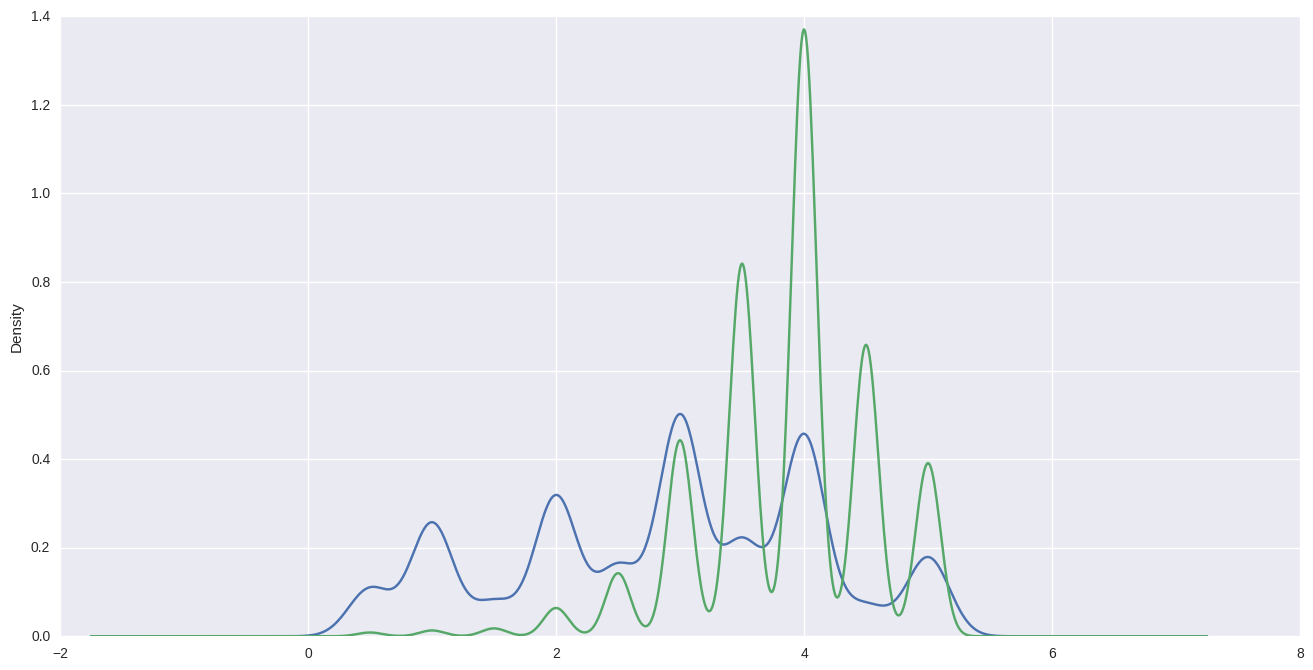

In [15]:
# Check Histogram for The Blair Witch Project
ratings.loc[ratings.movieId == 2710,'rating'].plot.density(figsize=(16,8));
ratings.loc[ratings.movieId == 5989,'rating'].plot.density(figsize=(16,8));
#ratings.loc[ratings.movieId == 2710,'rating'].hist(figsize=(16,8),bins=5,alpha=0.5); 
#ratings.loc[ratings.movieId == 5989,'rating'].hist(figsize=(16,8),bins=5,alpha=0.5); 

## The Most Popular Movies

In [16]:
movie_stats.sort_values('size', ascending=False).head(10)

,,size,mean,std
movieId,title,,,
296,Pulp Fiction (1994),67310.0,4.174231,0.976076
356,Forrest Gump (1994),66172.0,4.029000,0.948018
318,"Shawshank Redemption, The (1994)",63366.0,4.446990,0.717525
593,"Silence of the Lambs, The (1991)",63299.0,4.177057,0.842421
480,Jurassic Park (1993),59715.0,3.664741,0.927818
260,Star Wars: Episode IV - A New Hope (1977),54502.0,4.190672,0.918522
110,Braveheart (1995),53769.0,4.042534,0.955058
589,Terminator 2: Judgment Day (1991),52244.0,3.931954,0.903087
2571,"Matrix, The (1999)",51334.0,4.187186,0.887929


## Global Mean of All Ratings

In [17]:
timestamps = ratings[['date','rating']]
timestamps.set_index('date',inplace=True)
print("Golbal Mean of ALL Ratings: "+str(timestamps['rating'].mean()))

Golbal Mean of ALL Ratings: 3.5255285643


## How Ratings Change Through Time

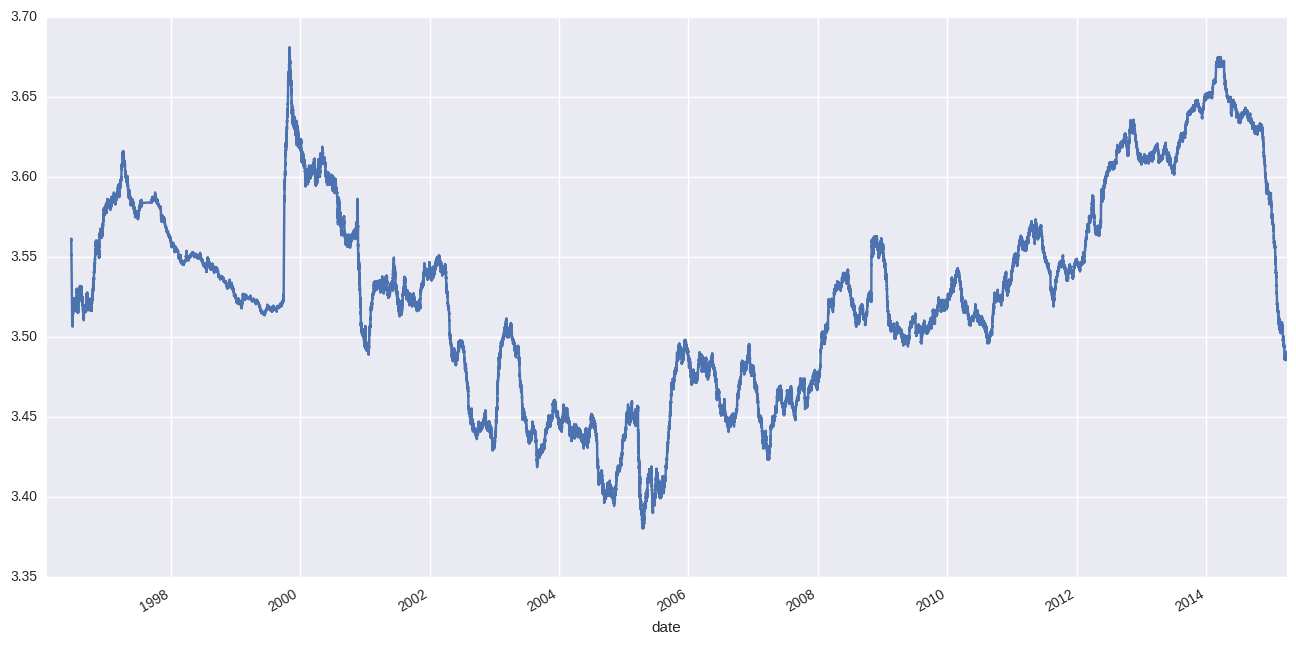

In [18]:
timestamps['rating'].sample(500000).sort_index().rolling(window=10000,center=False).mean().plot(figsize=(16,8));

## Variability of moves trhough time

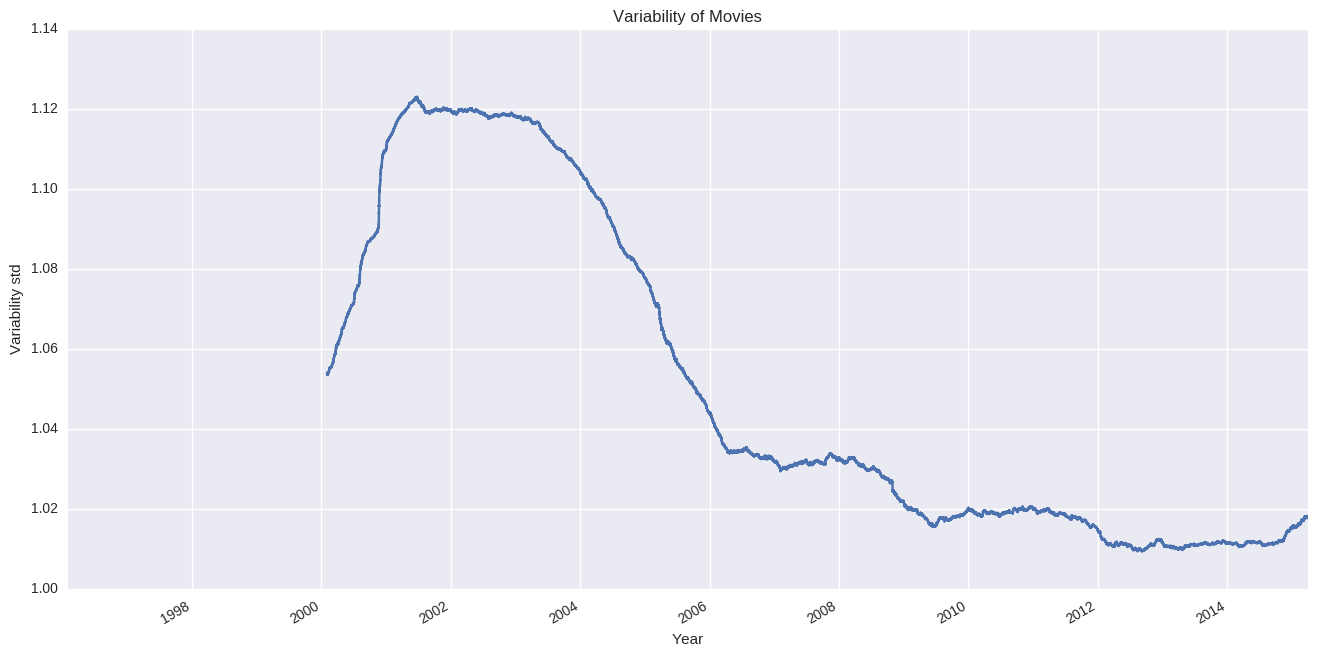

In [19]:
ax = timestamps['rating'].sample(500000).sort_index().rolling(window=100000,center=False).std().plot(figsize=(16,8));
ax.set_ylabel('Variability std');
ax.set_xlabel('Year');
ax.set_title('Variability of Movies');

## Ratings of The Shawshank Redemption through time

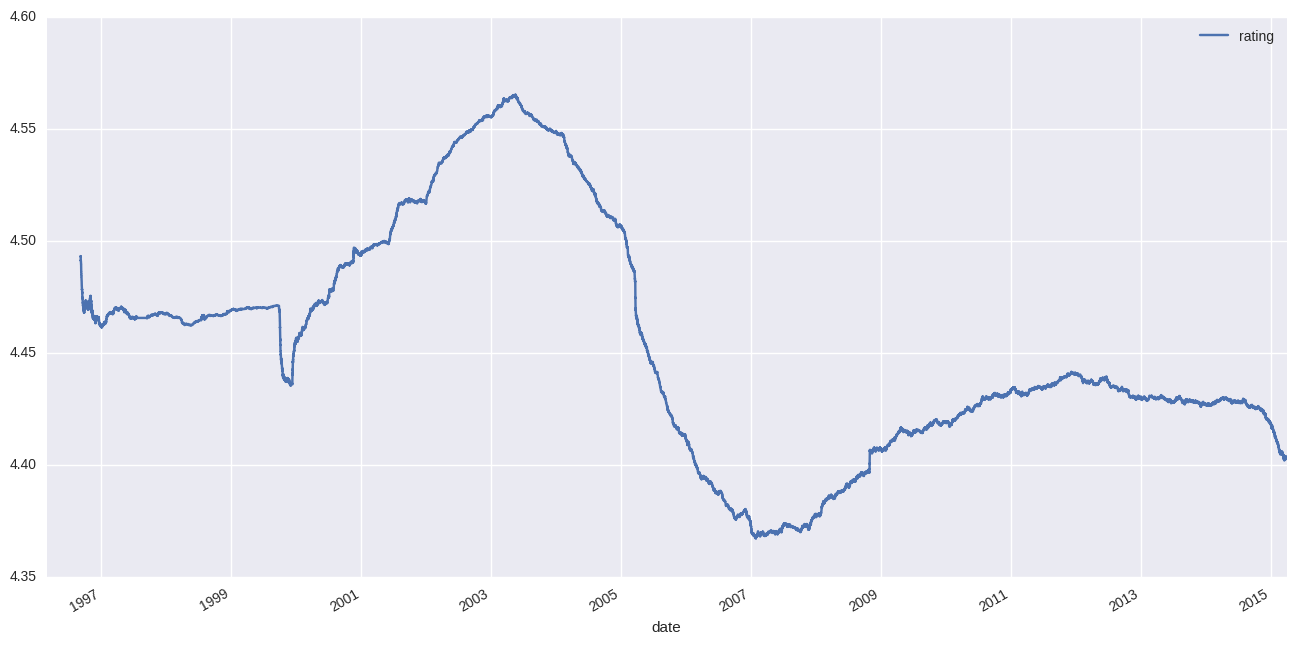

In [20]:
ratings.loc[ratings.movieId == 318,['date','rating']].set_index('date').sort_index().\
    rolling(window=10000,center=False).mean().plot(figsize=(16,8));

## Number of Ratings per Year

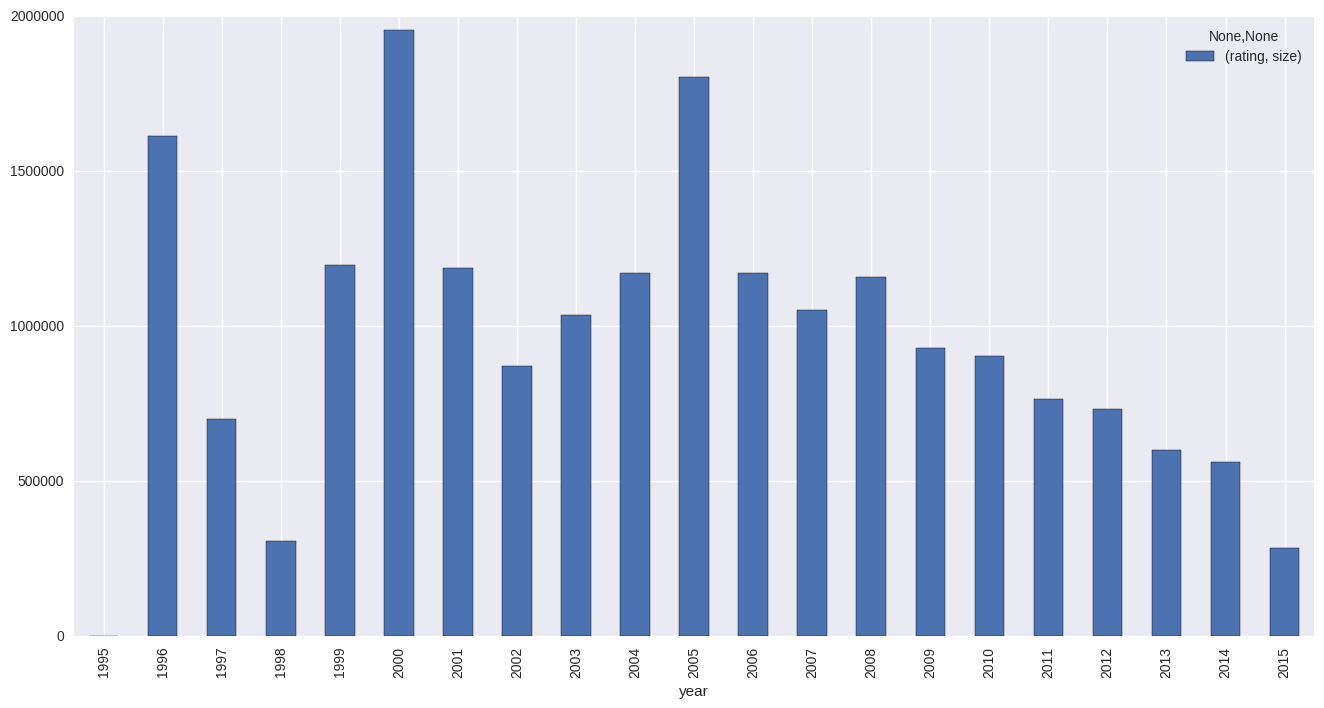

In [21]:
ratings['year'] = pd.DatetimeIndex(ratings['date']).year
ratings[['year','rating']].groupby('year').agg([np.size]).plot(kind='bar',figsize=(16,8));

## Histogram of number of reviews per user

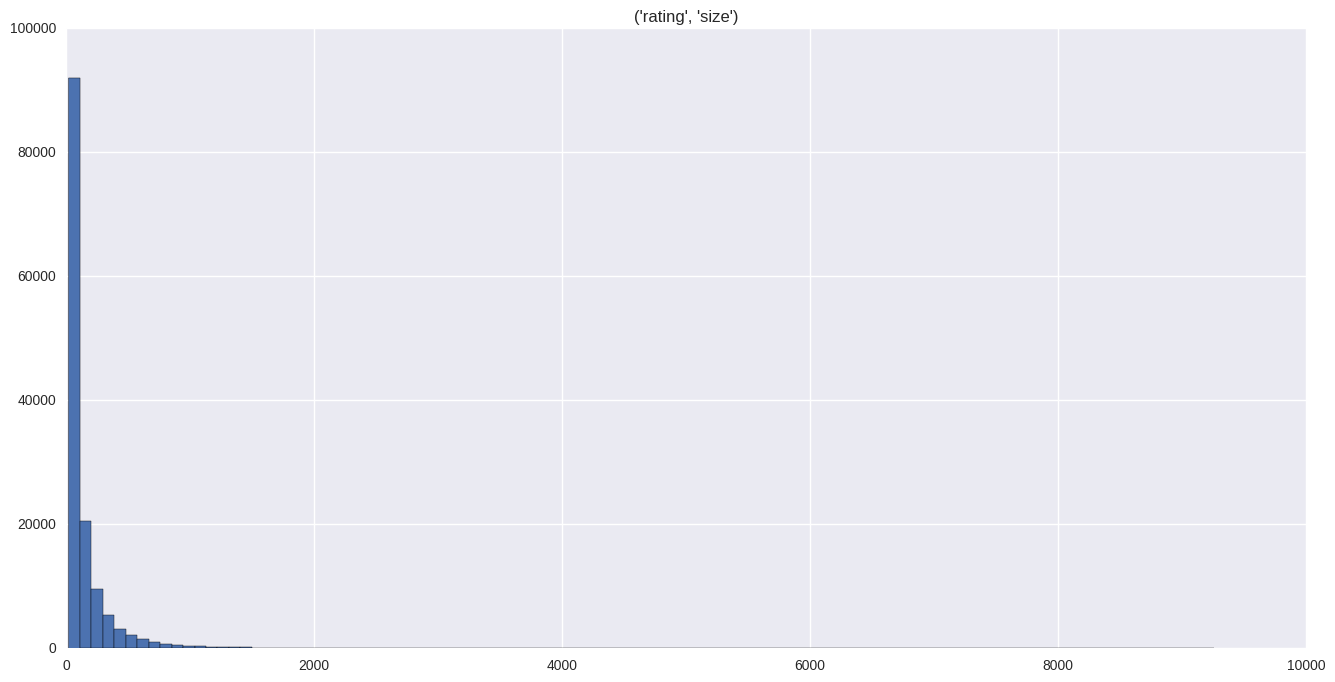

In [22]:
ratings[['userId','rating']].groupby('userId').agg([np.size]).hist(bins=100,figsize=(16,8));

## Histogram of number of reviews per movie

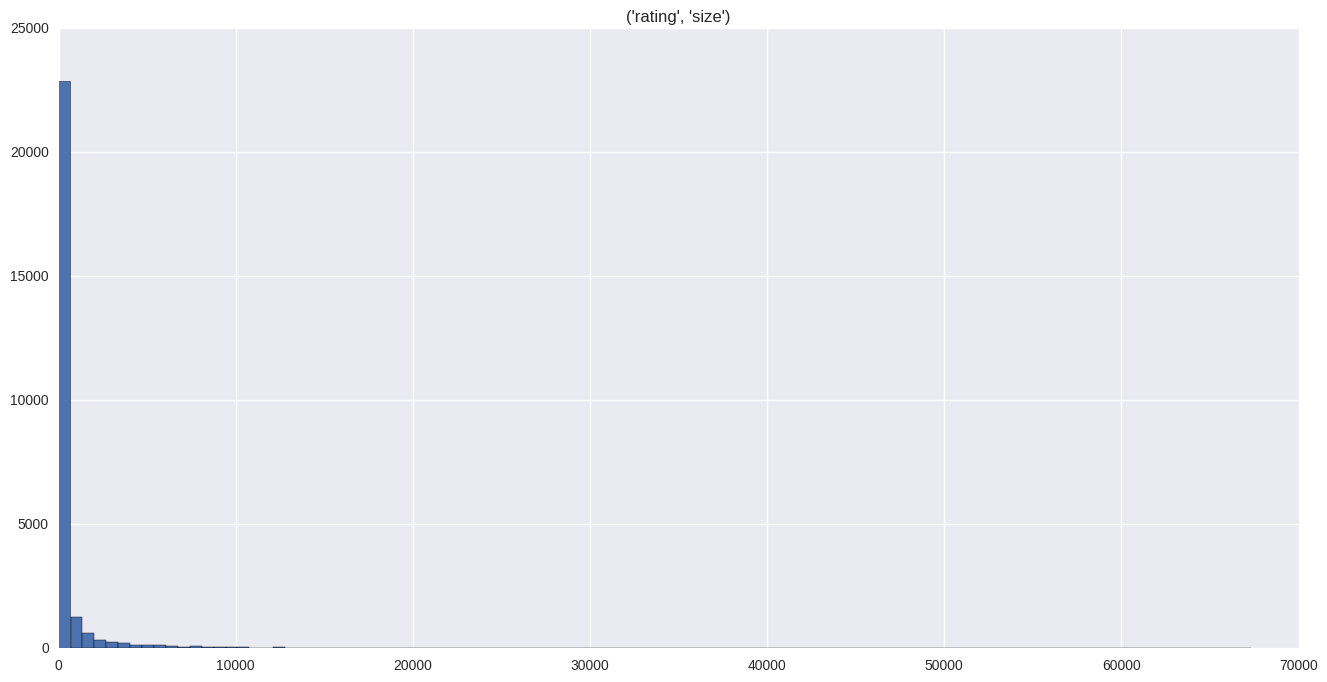

In [23]:
ratings[['movieId','rating']].groupby('movieId').agg([np.size]).hist(bins=100,figsize=(16,8));

## Sparsity of the Ratings

In [24]:
ratings_matrix = ratings.sample(100).pivot_table(index='userId',columns='movieId',values='rating').head()

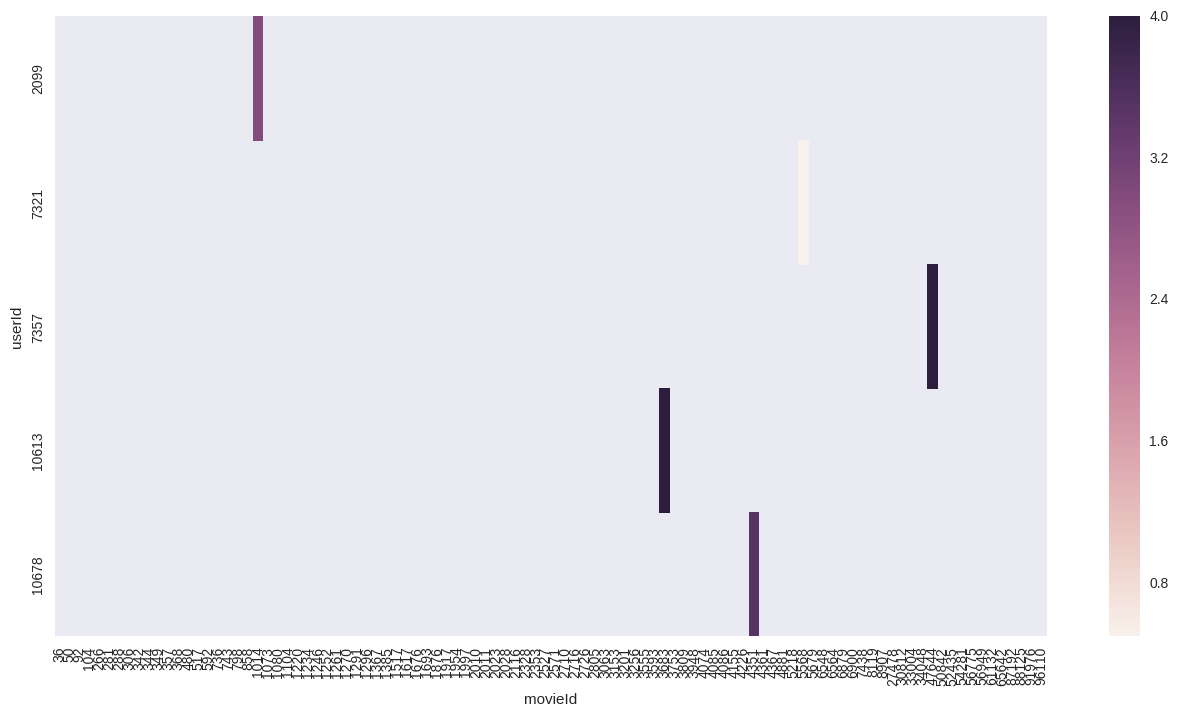

In [25]:
fig, ax = plt.subplots(figsize=(16,8))         # Sample figsize in inches
sns.heatmap(ratings_matrix);

In [253]:
movies.loc[movies.movieId==2355]

,movieId,title,genres,year
2270,2355,"Bug's Life, A (1998)",Adventure|Animation|Children|Comedy,1998
